<a href="https://colab.research.google.com/github/gaciuki2402/Deep_Learning_Project/blob/main/MNIST_Handwritten_Digit_Classification_using_Deep_Learning(Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
from google.colab import drive
drive.mount("/content/drive")
#impoting dependancies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# cv means computer vision
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
# loading the MNIST data from keras datasets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [200]:
type(X_train)

numpy.ndarray

In [201]:
# shape of the numpy array
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images


Test data = 10,000 images

image dimension ->28*28


Grayscale image -> 1 channel


In [202]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [203]:
print(X_train[10].shape)

(28, 28)


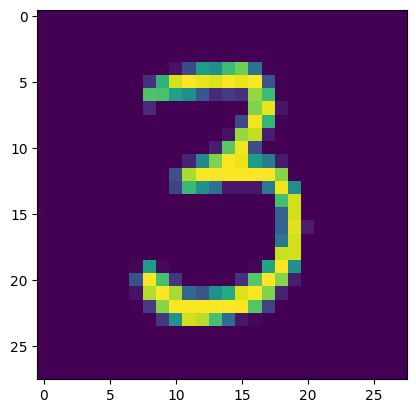

3


In [204]:
# displaying the image
plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

image labels


In [205]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [206]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in X_train
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use this labels as such or we can also apply one Hot Encoding

All the images have the same dimension in this dataset, if not, we have to resize all the images to a common dimension.

In [207]:
from re import X
# scaling the values
X_train = X_train/255
X_test = X_test/255
# 255 is the maximum value present in this data

In [208]:
# print the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a neural network

In [209]:
# setting up the layers of the neural network using the keras library

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

keras.Sequential initializes a sequential model

keras.layers(input_shape) adds the input layer to the model with dimension 28*28

keras.layers.Dense adds layer with 50 uits and relu activation to the model. The dense layer is a fully connected layer where each neuron is connected to every neuron in the previous layer


There are two hidden layers with 50 neurons each, and an output layer with 10 neurons for classification task.

In [210]:
# compiling the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

optimizer specifies the optimizer to be used during training

loss defines the loss function to be used during training


metrics specifies the evaluation metric to be used to monitor the training and testing perfomance of the model

In [211]:
# training the neural network
model.fit(X_train, Y_train, epochs=10)
# epochs is the number of times our neural network has to go through our model


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2939 - accuracy: 0.9156
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1349 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997 - accuracy: 0.9697
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0819 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0600 - accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0503 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0451 - accuracy: 0.9856
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

"Accuracy on Test Data"

In [212]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0961 - accuracy: 0.9754
0.9753999710083008
0.09614603221416473


In [213]:
print(X_test.shape)

(10000, 28, 28)


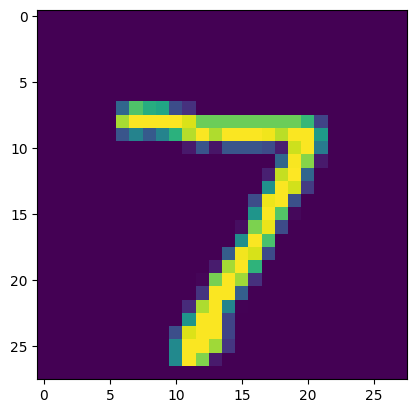

In [214]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [215]:
print(Y_test[0])

7


In [216]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 10)


In [217]:
print(Y_pred[0])

[8.0320146e-04 2.5888745e-02 8.1194460e-01 9.8572838e-01 5.4622268e-07
 1.8466018e-02 2.3762116e-06 9.9999374e-01 5.6358310e-03 6.1191814e-03]


In [218]:
# converting the prediction probability to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)


7


In [219]:
# model.predict() gives the prediction probability of each class for that data points
Y_predict_labels = [np.argmax(i) for i in Y_pred]
print(Y_predict_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

# Y_test --> True labels
# Y_pred_labels-->Predicted labels

In [220]:
# confusion matrix
conf_mat = confusion_matrix(Y_test, Y_predict_labels)
print(conf_mat)

tf.Tensor(
[[ 964    1    1    2    0    4    4    1    2    1]
 [   0 1127    2    0    0    0    2    0    4    0]
 [   0    2 1012    3    2    0    3    5    4    1]
 [   0    1   10  967    0   17    0    5    4    6]
 [   1    1    4    1  955    0    4    4    0   12]
 [   2    0    0    5    1  873    6    0    2    3]
 [   2    1    1    1    3   10  936    0    4    0]
 [   1    7   11    2    2    0    0 1000    1    4]
 [   1    0    7    5    4    6    2    4  941    4]
 [   1    2    0    3    8    7    1    8    1  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

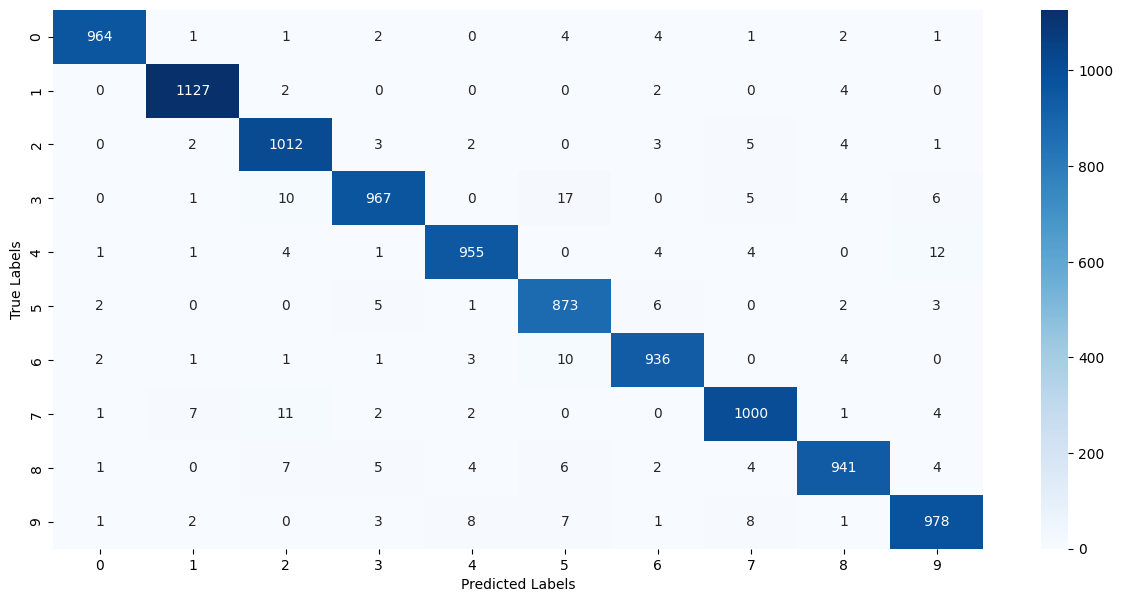

In [221]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [222]:
# building a predictive image
input_img_path = '/content/drive/MyDrive/CSV/MNIST_digit.png'
input_image =cv2.imread(input_img_path)

In [223]:
type(input_image)

numpy.ndarray

In [224]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


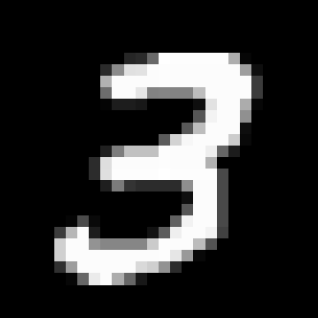

In [225]:
cv2_imshow(input_image)

In [226]:
input_image.shape

(318, 318, 3)

In [227]:
grayscale=cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [228]:
grayscale.shape

(318, 318)

In [229]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [230]:
input_image_resize.shape

(28, 28)

In [231]:
cv2_imshow(input_image_resize)

In [232]:
input_image_resize = input_image_resize/255
type(input_image_resize)

numpy.ndarray

In [233]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [234]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 22ms/step
[[9.2761643e-10 1.1010523e-02 7.5319954e-03 1.0000000e+00 1.0137239e-10
  7.3230597e-03 8.4377748e-12 7.6165011e-06 2.3324852e-01 6.6350508e-01]]


In [235]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Path of the image to be predicted/content/drive/MyDrive/CSV/MNIST_digit.png


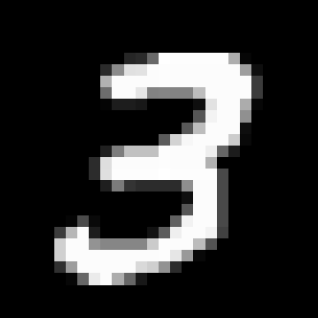

1/1 [==============================] - 0s 20ms/step
The Handwitten Digit is recognized as 3


In [236]:
input_image_path = input("Path of the image to be predicted")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale, (28, 28))
input_image_resize=input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print("The Handwitten Digit is recognized as", input_pred_label)